In [91]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,roc_auc_score,classification_report,f1_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.dummy import DummyClassifier
from sklearn import metrics
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import PrecisionRecallDisplay

In [92]:
df=pd.read_csv('dataset.csv')

In [93]:
df.head()

age     sex  cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0   63    male   3     145.0  233.0    1        0    150.0      0      2.3   
1   37    male   2     130.0  250.0    0        1    187.0      0      3.5   
2   41  female   1     130.0  204.0    0        0    172.0      0      1.4   
3   56    male   1     120.0  236.0    0        1    178.0      0      0.8   
4   57  female   0       NaN  354.0    0        1    163.0      1      0.6   

   slope  ca  thal target  
0      0   0     1    yes  
1      0   0     2    yes  
2      2   0     2    yes  
3      2   0     2    yes  
4      2   0     2    yes

In [94]:
df.tail()

age     sex  cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
298   57  female   0     140.0  241.0    0        1    123.0      1      0.2   
299   45    male   3     110.0  264.0    0        1    132.0      0      1.2   
300   68    male   0     144.0  193.0    1        1    141.0      0      3.4   
301   57    male   0       NaN  131.0    0        1    115.0      1      1.2   
302   57  female   1     130.0  236.0    0        0    174.0      0      0.0   

     slope  ca  thal target  
298      1   0     3     no  
299      1   0     3     no  
300      1   2     3     no  
301      1   1     3     no  
302      1   1     2     no

In [95]:
df.shape

(303, 14)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    object 
 2   cp        303 non-null    int64  
 3   trestbps  299 non-null    float64
 4   chol      302 non-null    float64
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   298 non-null    float64
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    object 
dtypes: float64(4), int64(8), object(2)
memory usage: 33.3+ KB


In [97]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    4
chol        1
fbs         0
restecg     0
thalach     5
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [98]:
df['trestbps'].fillna(df['trestbps'].median(),inplace=True)
df['chol'].fillna(df['chol'].median(),inplace=True)
df['thalach'].fillna(df['thalach'].median(),inplace=True)

In [99]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [100]:
df['target'].value_counts()

yes    165
no     138
Name: target, dtype: int64

In [101]:
X=df.drop(columns='target',axis=1)
Y=df['target']

In [102]:
X['sex']=X['sex'].replace({'male': 1, 'female': 0}).astype(int)
Y=Y.replace({'yes': 1, 'no': 0}).astype(int)

In [103]:
y = df.target.value_counts()
x = ['Disease','No Disease']
title = go.layout.Title(text='Target Variable (Heart Disease) Distribution')
layout = go.Layout(title=title)
data = go.Bar(x=x,y=y,text=y,textposition='auto')
fig = go.Figure(data=[data],layout=layout)
fig.update_xaxes(title_text='Target')
fig.update_yaxes(title_text='Number of Individuals')
fig.show()

In [104]:
fig = px.histogram(df,x='age',color_discrete_sequence=['coral'])
fig.update_xaxes(title_text='Age')
fig.update_yaxes(title_text='Count')
fig.update_layout(title_text='Distribution of Age.')
fig.show()

In [105]:
chest_pain_types = ['Typical Angina', 'Atypical Angina', 'Non-Anginal Pain', 'Asymptomatic']
chest_pain_counts_no_disease = df[df['target'] == 'no']['cp'].value_counts()
chest_pain_counts_disease = df[df['target'] == 'yes']['cp'].value_counts()
non_disease_data = go.Bar(name='No Disease', x=chest_pain_types, y=chest_pain_counts_no_disease)
disease_data = go.Bar(name='Disease', x=chest_pain_types, y=chest_pain_counts_disease)
fig = go.Figure(data=[non_disease_data, disease_data])
fig.update_xaxes(title_text='Chest Pain Type')
fig.update_yaxes(title_text='Count')
fig.update_layout(title_text='Distribution of Disease by Chest Pain Type', barmode='group')
fig.show()

In [106]:
disease_values = df[df['target']=='yes'].fbs.value_counts()
no_disease_values = df[df['target']=='no'].fbs.value_counts()
x = ['No Blood Sugar','Blood Sugar']
disease_data = go.Bar(name='Disease',x=x,y=disease_values,textposition='auto')
no_disease_data = go.Bar(name='No Disease',x=x,y=no_disease_values,textposition='auto')
fig = go.Figure(data=[disease_data,no_disease_data])
fig.update_layout(title_text='Distribution of Target Variable According to Fasting Blood Sugar',barmode='group')
fig.update_xaxes(title_text='Fasting Blood Sugar(FBS)')
fig.update_yaxes(title_text='Count')
fig.show()

In [107]:
ca = ['0','1','2','3']
ca_y0 = df[df['target']=='no'].ca.value_counts()
ca_y1 = df[df['target']=='yes'].ca.value_counts()
no_disease_data = go.Bar(name='No Disease',x=ca,y=ca_y0)
disease_data = go.Bar(name='Disease',x=ca,y=ca_y1)
fig = go.Figure(data=[disease_data,no_disease_data])
fig.update_xaxes(title_text='Number of Major Blood Vesels')
fig.update_yaxes(title_text='Count')
fig.update_layout(title_text='Distribution of Target Variable According to Number of Major Blood Vessels',barmode='group')
fig.show()

age            Axes(0.125,0.53;0.110714x0.35)
cp          Axes(0.257857,0.53;0.110714x0.35)
trestbps    Axes(0.390714,0.53;0.110714x0.35)
chol        Axes(0.523571,0.53;0.110714x0.35)
fbs         Axes(0.656429,0.53;0.110714x0.35)
restecg     Axes(0.789286,0.53;0.110714x0.35)
thalach        Axes(0.125,0.11;0.110714x0.35)
exang       Axes(0.257857,0.11;0.110714x0.35)
oldpeak     Axes(0.390714,0.11;0.110714x0.35)
slope       Axes(0.523571,0.11;0.110714x0.35)
ca          Axes(0.656429,0.11;0.110714x0.35)
thal        Axes(0.789286,0.11;0.110714x0.35)
dtype: object

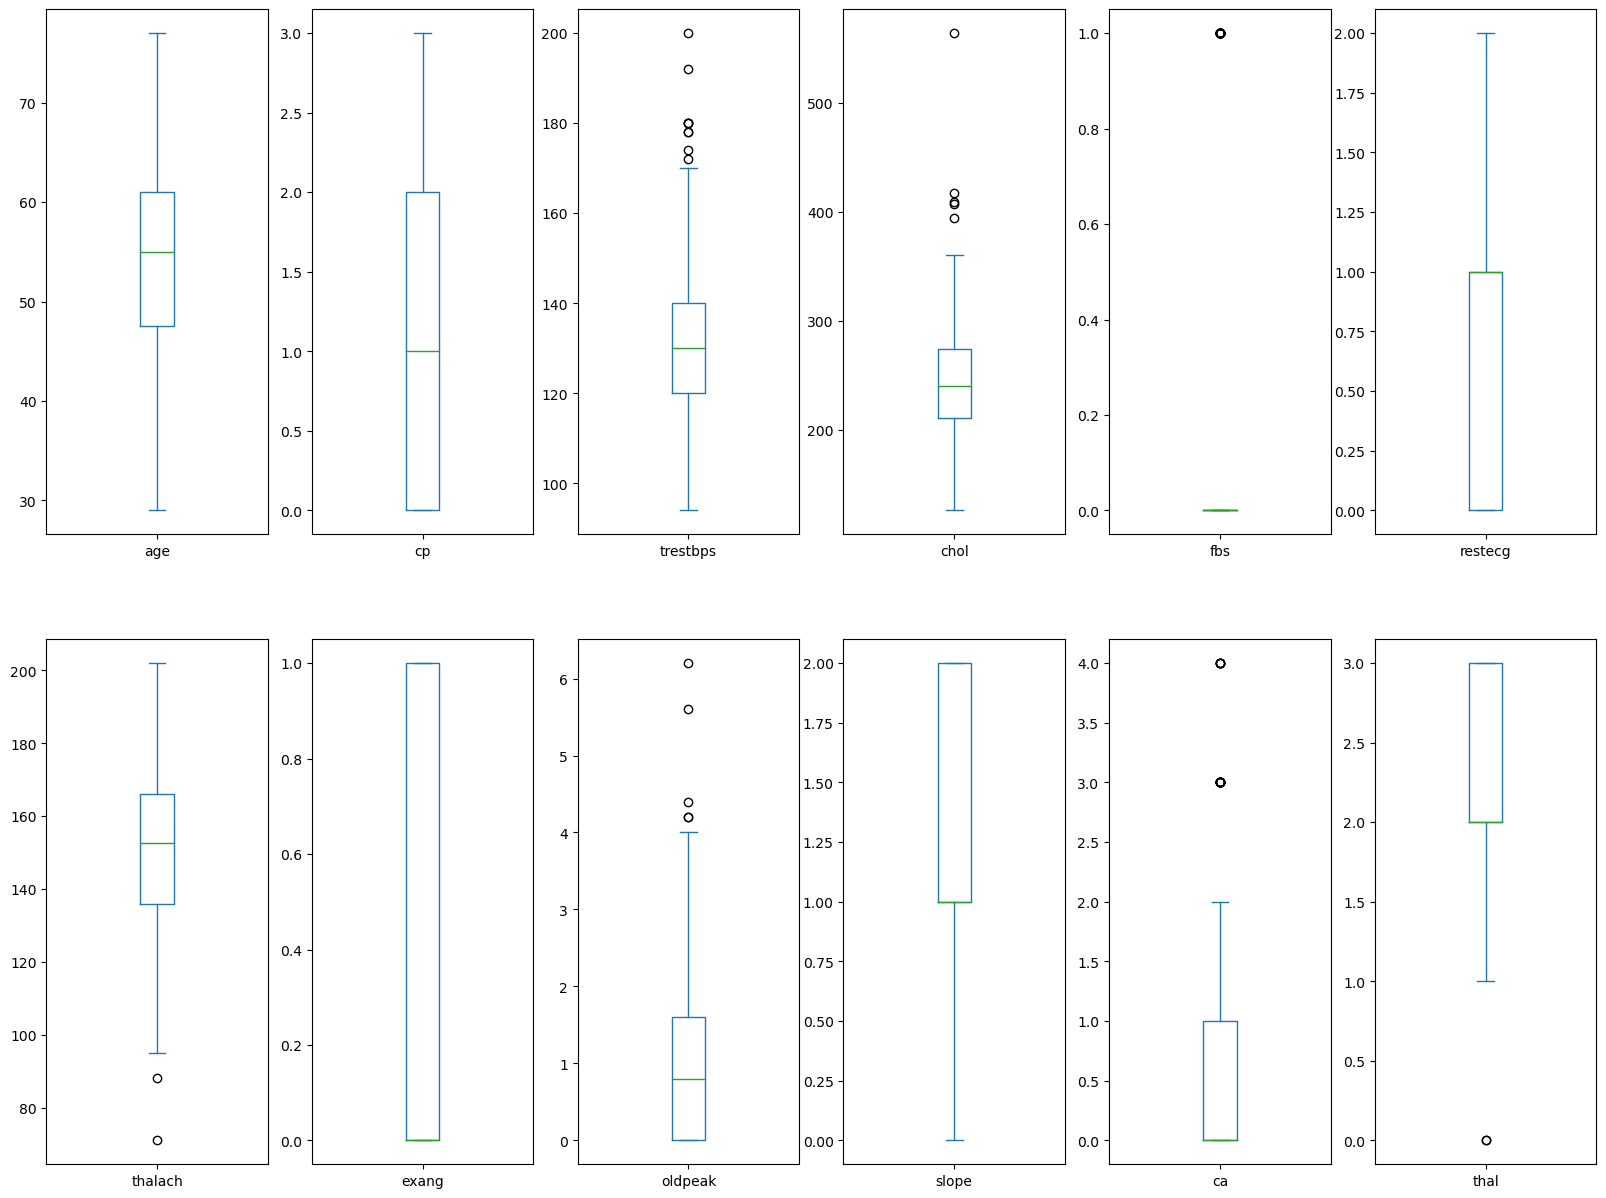

In [108]:
df.plot(kind='box',subplots=True,sharex=False,sharey=False,layout=(2,6),figsize=(20,15))

In [109]:
df.chol.describe()

count    303.000000
mean     246.298680
std       51.823351
min      126.000000
25%      211.000000
50%      240.500000
75%      274.500000
max      564.000000
Name: chol, dtype: float64

In [110]:
df.loc[df['chol']==df.chol.max(),'chol'] = df.chol.median()

age            Axes(0.125,0.53;0.110714x0.35)
cp          Axes(0.257857,0.53;0.110714x0.35)
trestbps    Axes(0.390714,0.53;0.110714x0.35)
chol        Axes(0.523571,0.53;0.110714x0.35)
fbs         Axes(0.656429,0.53;0.110714x0.35)
restecg     Axes(0.789286,0.53;0.110714x0.35)
thalach        Axes(0.125,0.11;0.110714x0.35)
exang       Axes(0.257857,0.11;0.110714x0.35)
oldpeak     Axes(0.390714,0.11;0.110714x0.35)
slope       Axes(0.523571,0.11;0.110714x0.35)
ca          Axes(0.656429,0.11;0.110714x0.35)
thal        Axes(0.789286,0.11;0.110714x0.35)
dtype: object

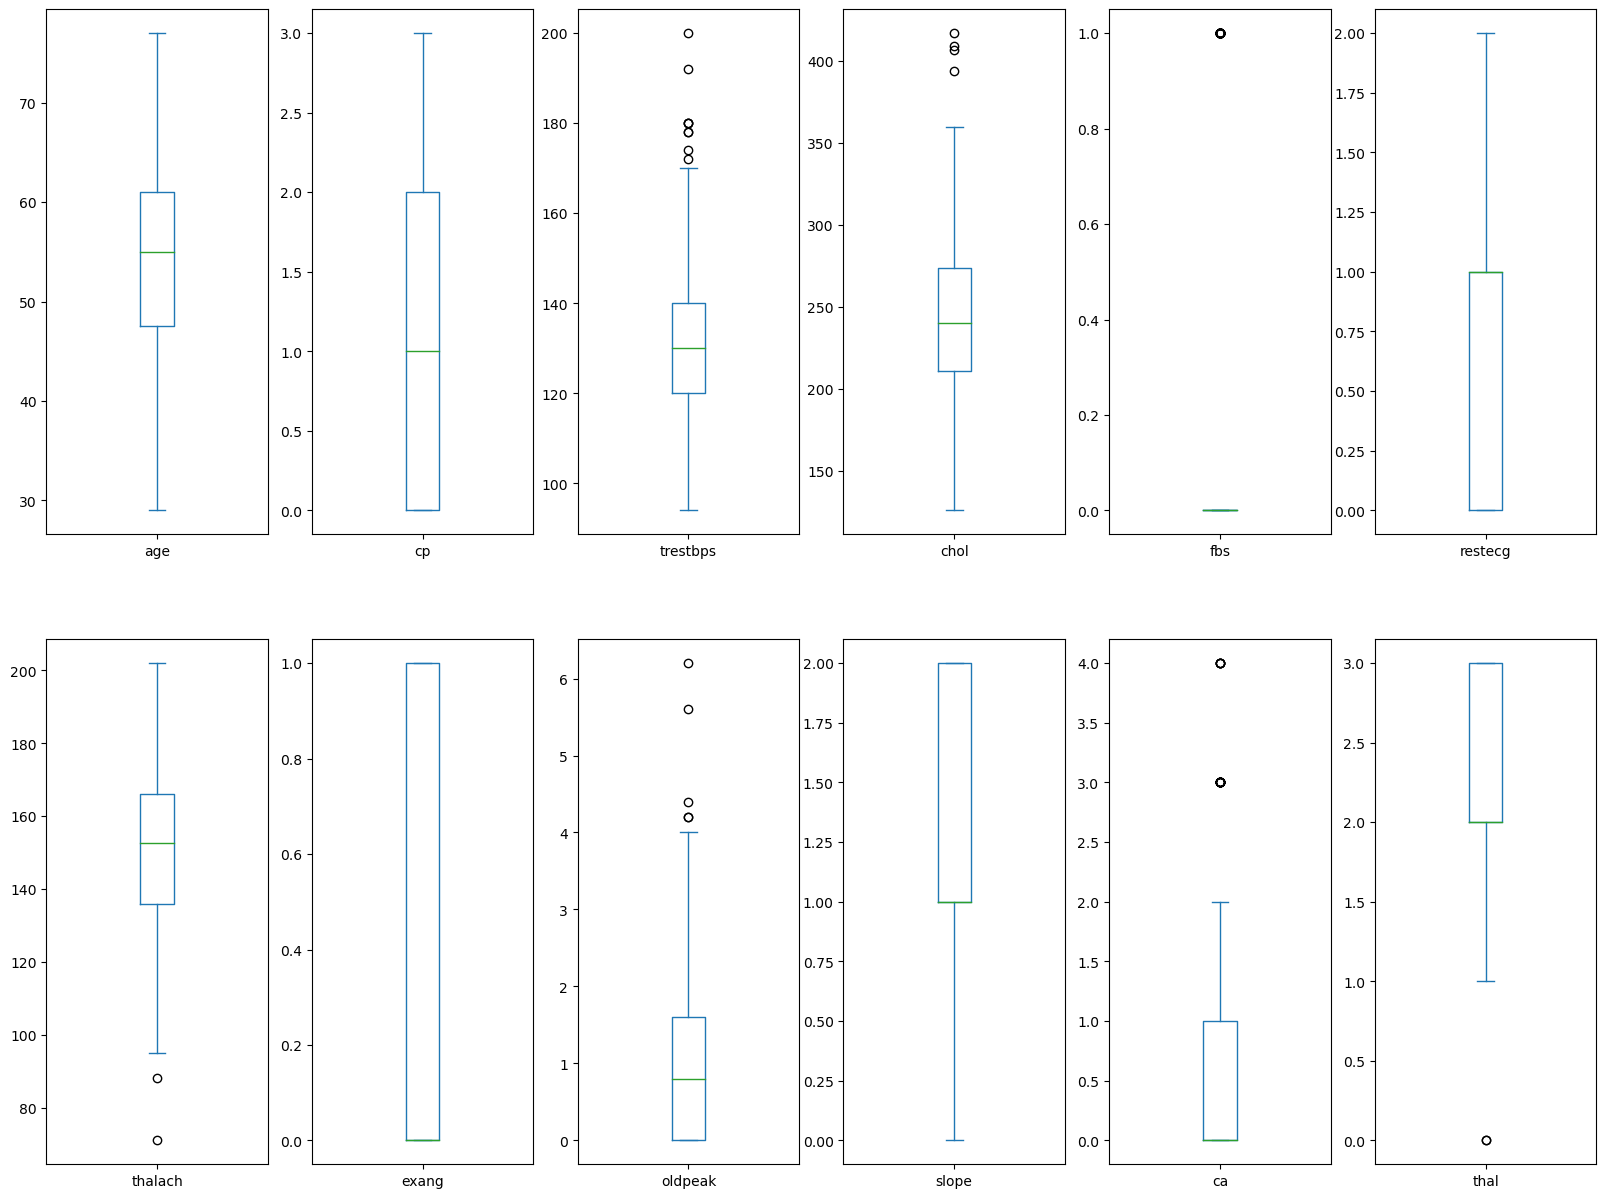

In [111]:
df.plot(kind='box',subplots=True,sharex=False,sharey=False,layout=(2,6),figsize=(20,15))

In [112]:
df.chol.describe()

count    303.000000
mean     245.231023
std       48.481010
min      126.000000
25%      211.000000
50%      240.500000
75%      274.000000
max      417.000000
Name: chol, dtype: float64

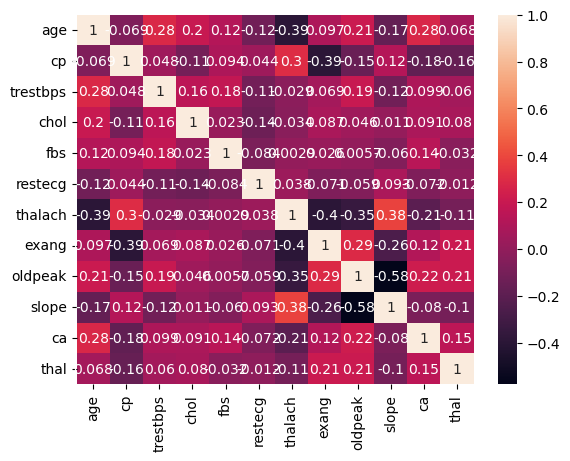

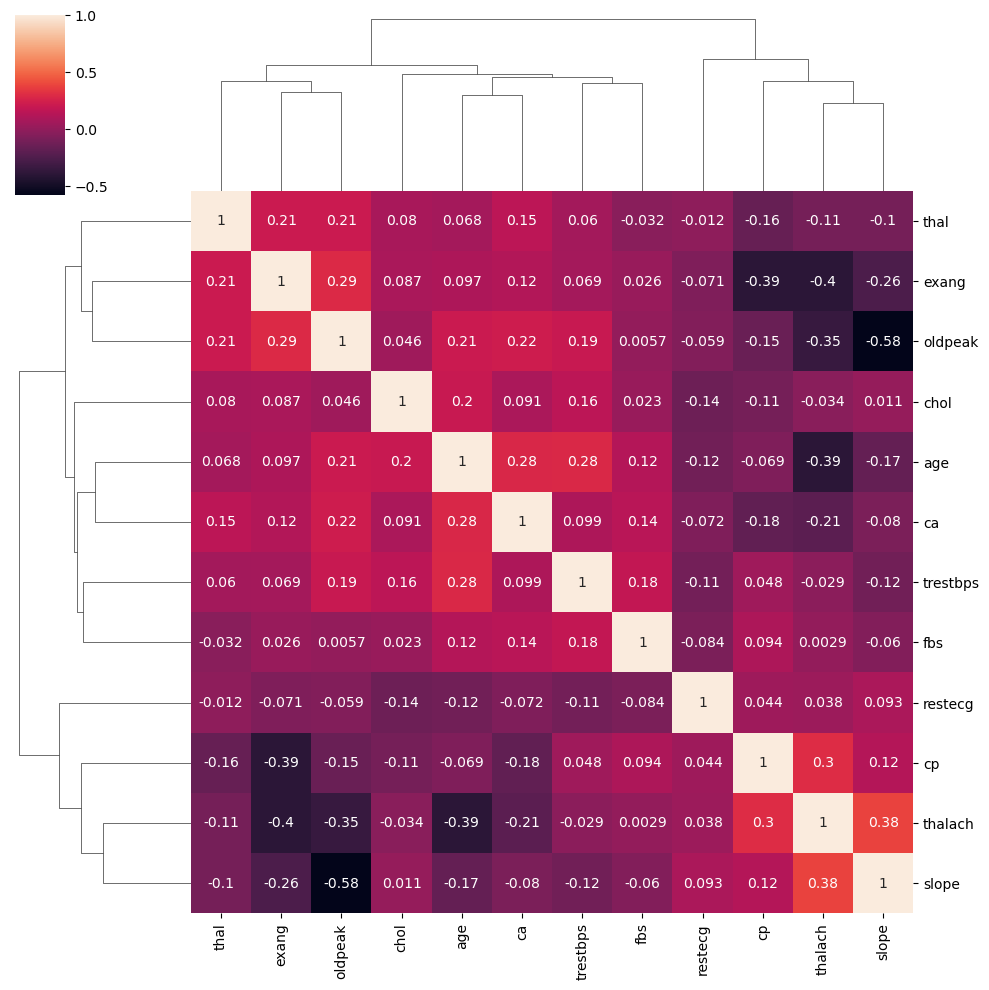

In [113]:
correlations=df.corr(numeric_only=True)
sns.heatmap(correlations, xticklabels=correlations.columns, yticklabels=correlations.columns, annot=True)
sns.clustermap(correlations, xticklabels=correlations.columns, yticklabels=correlations.columns, annot=True)

Train-Test-Validation data split

In [114]:
X_train,X_temp,Y_train,Y_temp=train_test_split(X,Y,test_size=0.5,random_state=143)
X_val,X_test,Y_val,Y_test=train_test_split(X_temp,Y_temp,test_size=0.5,random_state=143)
print(X.shape,X_train.shape,X_test.shape,X_val.shape)

(303, 13) (151, 13) (76, 13) (76, 13)


Function to print accuracy,f1 score,Confusion Matrix,Classification Report)

In [115]:
def calculateScores(Y_pred,Y_test=Y_test):
    acc = metrics.accuracy_score(Y_test,Y_pred)
    f1 = metrics.f1_score(Y_test,Y_pred)
    conf = confusion_matrix(Y_test,Y_pred)
    report = classification_report(Y_test,Y_pred)
    return acc,f1,conf,report

def printScores(acc,f1,conf,report):
    print("Test Accuracy Score :\n",acc,"\n")
    print("Test f1 Score :\n",f1,"\n")
    print("Confusion Matrix :\n",conf,"\n")
    print("Classification Report :\n",report,"\n")

Gaussian NB

In [116]:
nb=GaussianNB()
nb.fit(X_train,Y_train)
y_pred_val=nb.predict(X_val)
y_pred_nb=nb.predict(X_test)
acc_nb,f1_nb,conf_nb,report_nb=calculateScores(y_pred_nb)
printScores(acc_nb,f1_nb,conf_nb,report_nb)

Test Accuracy Score :
 0.9078947368421053 

Test f1 Score :
 0.9135802469135802 

Confusion Matrix :
 [[32  3]
 [ 4 37]] 

Classification Report :
               precision    recall  f1-score   support

           0       0.89      0.91      0.90        35
           1       0.93      0.90      0.91        41

    accuracy                           0.91        76
   macro avg       0.91      0.91      0.91        76
weighted avg       0.91      0.91      0.91        76
 



Gaussian NB - Cross Validation

In [117]:
param_grid_nb = {'var_smoothing':np.logspace(0,-20,num=2)}
grid_search_nb = GridSearchCV(estimator=nb,param_grid=param_grid_nb,cv=10,scoring='accuracy')
X_train_val = np.concatenate((X_train, X_val))
y_train_val = np.concatenate((Y_train, Y_val))
grid_search_nb.fit(X_train_val,y_train_val)

nb_params = grid_search_nb.best_params_
nb_grid = GaussianNB(**nb_params)
nb_grid.fit(X_train,Y_train)

y_pred_nb_grid = nb_grid.predict(X_test)
acc_nb_grid,f1_nb_grid,conf_nb_grid,report_nb_grid = calculateScores(y_pred_nb_grid)
printScores(acc_nb_grid,f1_nb_grid,conf_nb_grid,report_nb_grid)

Test Accuracy Score :
 0.9078947368421053 

Test f1 Score :
 0.9135802469135802 

Confusion Matrix :
 [[32  3]
 [ 4 37]] 

Classification Report :
               precision    recall  f1-score   support

           0       0.89      0.91      0.90        35
           1       0.93      0.90      0.91        41

    accuracy                           0.91        76
   macro avg       0.91      0.91      0.91        76
weighted avg       0.91      0.91      0.91        76
 



Gaussian NB - ROC,PR curves

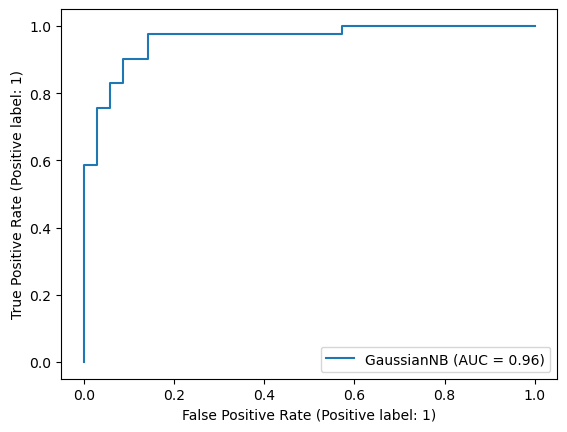

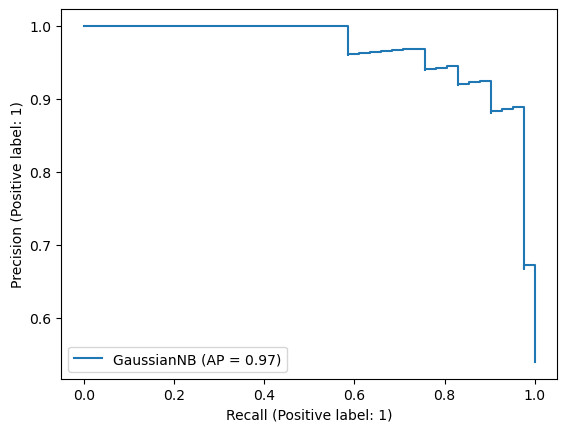

In [118]:
RocCurveDisplay.from_estimator(nb_grid,X_test,Y_test)
PrecisionRecallDisplay.from_estimator(nb_grid,X_test,Y_test)

Logistic Regression 

In [119]:
#Scaled Data
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
X_val_scaled=scaler.transform(X_val)

lr=LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled,Y_train)
y_pred_val=lr.predict(X_val_scaled)
y_pred_lr=lr.predict(X_test_scaled)
acc_lr,f1_lr,conf_lr,report_lr=calculateScores(y_pred_lr)
printScores(acc_lr,f1_lr,conf_lr,report_lr)

Test Accuracy Score :
 0.881578947368421 

Test f1 Score :
 0.8941176470588236 

Confusion Matrix :
 [[29  6]
 [ 3 38]] 

Classification Report :
               precision    recall  f1-score   support

           0       0.91      0.83      0.87        35
           1       0.86      0.93      0.89        41

    accuracy                           0.88        76
   macro avg       0.88      0.88      0.88        76
weighted avg       0.88      0.88      0.88        76
 



Logistic Regression - Cross Validaion

In [120]:
param_grid_lr = {'penalty':['l1','l2'],
                  'C':np.logspace(-4,4,20),'solver': ['liblinear']}
grid_search_lr = GridSearchCV(estimator=lr,param_grid = param_grid_lr,cv=10,scoring='accuracy',n_jobs=-1)
X_train_val = np.concatenate((X_train, X_val))
y_train_val = np.concatenate((Y_train, Y_val))
grid_search_lr.fit(X_train_val,y_train_val)

lr_params = grid_search_lr.best_params_
lr_grid = LogisticRegression(**lr_params)
lr_grid.fit(X_train_val,y_train_val)
y_pred_lr_grid = lr_grid.predict(X_test)
acc_lr_grid,f1_lr_grid,conf_lr_grid,report_lr_grid = calculateScores(y_pred_lr_grid)
printScores(acc_lr_grid,f1_lr_grid,conf_lr_grid,report_lr_grid)

Test Accuracy Score :
 0.8947368421052632 

Test f1 Score :
 0.9069767441860465 

Confusion Matrix :
 [[29  6]
 [ 2 39]] 

Classification Report :
               precision    recall  f1-score   support

           0       0.94      0.83      0.88        35
           1       0.87      0.95      0.91        41

    accuracy                           0.89        76
   macro avg       0.90      0.89      0.89        76
weighted avg       0.90      0.89      0.89        76
 



C:\Users\siril\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names



Logistic Regression -  ROC,PR curves

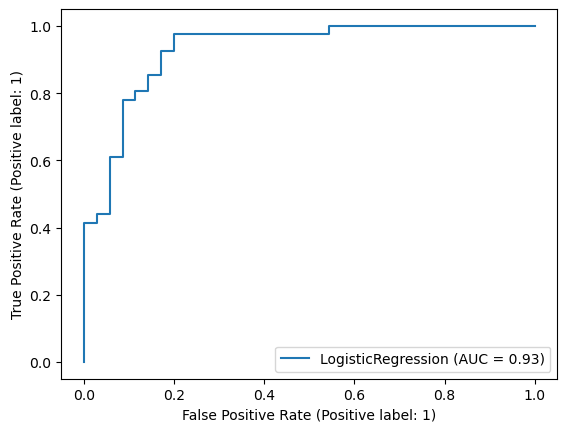

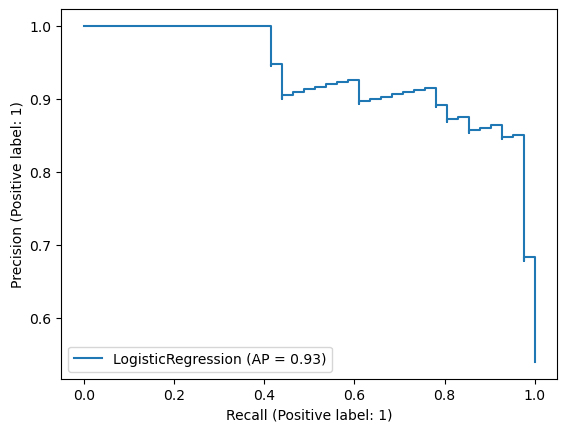

In [121]:
RocCurveDisplay.from_estimator(lr_grid,X_test_scaled,Y_test)
PrecisionRecallDisplay.from_estimator(lr_grid,X_test_scaled,Y_test)

Random Forest

In [122]:
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)
y_pred_rf=rf.predict(X_test)
acc_lr,f1_lr,conf_lr,report_lr=calculateScores(y_pred_rf)
printScores(acc_lr,f1_lr,conf_lr,report_lr)

Test Accuracy Score :
 0.8552631578947368 

Test f1 Score :
 0.8641975308641976 

Confusion Matrix :
 [[30  5]
 [ 6 35]] 

Classification Report :
               precision    recall  f1-score   support

           0       0.83      0.86      0.85        35
           1       0.88      0.85      0.86        41

    accuracy                           0.86        76
   macro avg       0.85      0.86      0.85        76
weighted avg       0.86      0.86      0.86        76
 



Random Forest - Cross Validation

In [ ]:
rf_classifier = RandomForestClassifier()
param_grid_ran = { 'n_estimators': [100, 200, 300],
                   'criterion': ['gini', 'entropy'], 
                   'max_depth': [None, 10, 20], 
                   'min_samples_split': [2, 5, 10],  
                   'min_samples_leaf': [1, 2, 4],  
                   'max_features': ['sqrt']   }
random_search_ran = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_grid_ran,
                                       n_iter=5, cv=10, scoring='accuracy', random_state=143)
X_train_val = np.concatenate((X_train, X_val))
y_train_val = np.concatenate((Y_train, Y_val))
random_search_ran.fit(X_train_val, y_train_val)
ran_params = random_search_ran.best_params_

In [ ]:
rf_classifier.fit(X_train, Y_train)
y_pred_val = rf_classifier.predict(X_val)
y_pred = rf_classifier.predict(X_test)
acc_lr,f1_lr,conf_lr,report_lr=calculateScores(y_pred)
printScores(acc_lr,f1_lr,conf_lr,report_lr)

Random Forest - ROC,PR curves

In [ ]:
RocCurveDisplay.from_estimator(rf_classifier,X_test,Y_test)
PrecisionRecallDisplay.from_estimator(rf_classifier,X_test,Y_test)

Linear Discriminant Analysis

In [ ]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)
y_pred = lda.predict(X_test)
acc_lr,f1_lr,conf_lr,report_lr=calculateScores(y_pred)
printScores(acc_lr,f1_lr,conf_lr,report_lr)

In [ ]:
cv_scores_accuracy=cross_val_score(lda, X_train, Y_train, cv=10, scoring='accuracy')
cv_scores_f1=cross_val_score(lda, X_train, Y_train, cv=10, scoring='f1_macro')
lda.fit(X_train, Y_train)
y_pred=lda.predict(X_test)
acc_lda=accuracy_score(Y_test, y_pred)
f1_lda=f1_score(Y_test, y_pred, average='macro')
conf_lda=confusion_matrix(Y_test, y_pred)
report_lda=classification_report(Y_test, y_pred)
printScores(acc_lda,f1_lda,conf_lda,report_lda)

Linear Discriminant Analysis - ROC,PR curves

In [ ]:
RocCurveDisplay.from_estimator(lda,X_test,Y_test)
PrecisionRecallDisplay.from_estimator(lda,X_test,Y_test)

Dummy Classifier

In [ ]:
dummy_cls = DummyClassifier(strategy='stratified')
dummy_cls.fit(X_train,Y_train)
y_pred_val = dummy_cls.predict(X_val)
y_pred = dummy_cls.predict(X_test)
acc_lr,f1_lr,conf_lr,report_lr=calculateScores(y_pred)
printScores(acc_lr,f1_lr,conf_lr,report_lr)

Dummy Classifier - ROC,PR curves

In [ ]:
RocCurveDisplay.from_estimator(dummy_cls,X_test,Y_test)
PrecisionRecallDisplay.from_estimator(dummy_cls,X_test,Y_test)

Ensemble (Naive Bayes and Logistic Regression)

In [ ]:
ensemble=VotingClassifier(estimators=[('gnb', nb), ('lr', lr)], voting='hard')
ensemble.fit(X_train_scaled, Y_train)
ensemble_pred = ensemble.predict(X_test_scaled)
acc_lr,f1_lr,conf_lr,report_lr=calculateScores(ensemble_pred)
printScores(acc_lr,f1_lr,conf_lr,report_lr)

Ensemble (Naive Bayes and Random Forest)

In [ ]:
ensemble=VotingClassifier(estimators=[('gnb', nb), ('rf', rf_classifier)], voting='hard')
ensemble.fit(X_train_scaled, Y_train)
ensemble_pred = ensemble.predict(X_test_scaled)
acc_lr,f1_lr,conf_lr,report_lr=calculateScores(ensemble_pred)
printScores(acc_lr,f1_lr,conf_lr,report_lr)

Ensemble (Naive Bayes and Linear Discriminant Analysis)

In [ ]:
ensemble=VotingClassifier(estimators=[('gnb', nb), ('lda', lda)], voting='hard')
ensemble.fit(X_train_scaled, Y_train)
ensemble_pred = ensemble.predict(X_test_scaled)
acc_lr,f1_lr,conf_lr,report_lr=calculateScores(ensemble_pred)
printScores(acc_lr,f1_lr,conf_lr,report_lr)

Ensemble (Naive Bayes and Dummy Classifier)

In [ ]:
ensemble=VotingClassifier(estimators=[('gnb', nb), ('dc', dummy_cls)], voting='hard')
ensemble.fit(X_train_scaled, Y_train)
ensemble_pred = ensemble.predict(X_test_scaled)
acc_lr,f1_lr,conf_lr,report_lr=calculateScores(ensemble_pred)
printScores(acc_lr,f1_lr,conf_lr,report_lr)